In [23]:
from __future__ import division, print_function
import glob, os

import utils; reload(utils)
from utils import plots

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import scipy
from itertools import *

%matplotlib inline
np.set_printoptions(precision=4, linewidth=100)

path = "/usr/local/google/home/zhach/datasets/catsvsdogs/"

cwd = os.getcwd()

Now that I have imported all the necessary imports and have the test and train file names, lets get to learning.

In [4]:
# If you think the computer can handle it, you can change it to 64
batch_size=64

# Also import the pretrained classes
import vgg16; reload(vgg16)
from vgg16 import Vgg16
vgg = Vgg16()


In [8]:
# Let's instantiate the class and get the batches
train_b = vgg.get_batches(path+'train', batch_size=batch_size)
valid_b = vgg.get_batches(path+'valid', batch_size=batch_size*2)

# Alias some class names
train_b.nb_class = train_b.num_class
train_b.nb_sample = train_b.samples
valid_b.nb_class = valid_b.num_class
valid_b.nb_sample = valid_b.samples

Found 17778 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.


In [ ]:
#  Lets finetune the batches
vgg.finetune(train_b)
vgg.fit(train_b, valid_b, nb_epoch=1)

In [5]:
vgg.model.save_weights(path+"results/ft1.h5")

In [6]:
vgg.model.load_weights(path+"results/ft1.h5")

In [10]:
val_batches, probs = vgg.test(path+'valid', batch_size=batch_size)

Found 7222 images belonging to 2 classes.


In [11]:
labels = val_batches.classes
filenames = val_batches.filenames

In [12]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

array([  1.6196e-04,   6.1621e-06,   3.6113e-05,   2.0190e-05,   4.6710e-07,   1.9243e-06,
         2.3753e-09,   7.8209e-05], dtype=float32)

In [13]:
preds[:8]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [14]:
n_view = 4
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filename[i]) for i in idx], titles=titles)

In [27]:
# A few correct labels at random
correct = np.where(preds==labels)[0]
idx = permutations(correct)[:n_view]
plots_idx(idx, probs[idx])

/usr/local/google/home/zhach/miniconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


TypeError: 'itertools.permutations' object has no attribute '__getitem__'

Found 17778 images belonging to 2 classes.


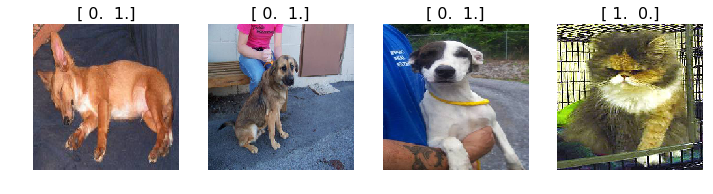

In [36]:
batches = vgg.get_batches(path+'train', batch_size=4)
imgs, labels = next(batches)
plots(imgs, titles=labels)